#### Breast Cancer Detection Model with Machine Learning

Modelo Classificador para detecção de Cancer de Mama.

1. Definição do Problema
    - qual o objetivo (quais perguntas queremos responder com este dataset?)
    - De onde vem o dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
    - para mais detalhes consulte:.....
    - Informaçoes sonbre os atributos (listar atributos e o que cada um deles significa)
2. Carga de Dados
3. Análise de Dados
    - Estatísticas descritivas (dimensões do dataset, info, head, tail, dataset.dtypes, dataset.describe, distribuicao das classes) - colocar gráfico da distrribuição das classes
    - Histograma para cada atributo do dataset (histograma ou density plot e boxplot)
    - Matriz de correlação e scatterplot
4. Pré-processamento de dados (preparação e limpeza dos dados)
    - Tratamento de valores missing (colocar gráfico de valores missing)
    - Transformaçoes (normalizacao, padronizacao)
    - Separacao em cj de treino e teste
5. Desenvolvimento dos modelos de Classificação
    - Definição dos parâmetros de validacao cruzada
    - criação dos modelos
    - comparacao do modelos
    - Ajuste dos modelos (hiperparametros)
6. Finalizacao
    - Escolha do modelo
    - Aplicação do modelo em dados não vistos
7. Conclusão
8. Limitações

Referências:
https://thecleverprogrammer.com/2020/11/14/breast-cancer-detection-with-machine-learning/
https://colab.research.google.com/drive/1d0VtmAltEsJ0i41U0TlV1MgcV7fKAZRW#scrollTo=HDcdO4yx9db6
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset




### 1. Problem understanding
- In this project, a machine learning model was created to classify the prognosis of a breast cancer (malignant or benign) based on features computed from digitized images of breast tumors. They describe characteristics of the cell nuclei present in the images.
- Some asks could be answered in the present analysis:
    1. Which features are more influential in prognosis?
    2. Which machine learning model presents the highest accuracy in determining prognosis?
    3. What is the value of this accuracy?
- The data set used is **Breast Cancer Wisconsin (Diagnostic) Data Set** from Scikit-Learn, originally found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. 
- This dataset contains 569 instances and 30 attributes.
- **Attribute Information:**
    * radius (mean of distances from center to points on the perimeter)
    * texture (standard deviation of gray-scale values)
    * perimeter
    * area
    * smoothness (local variation in radius lengths)
    * compactness (perimeter^2 / area - 1.0)
    * concavity (severity of concave portions of the contour)
    * concave points (number of concave portions of the contour)
    * symmetry
    * fractal dimension (“coastline approximation” - 1)
    The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features.

### 2. Load dataset:

In [1]:
# Import modules:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [26]:
# Dataset loading:
data_load = load_breast_cancer()

In [28]:
# Checking feature names and target names:
print(data_load.feature_names)
print(data_load.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [29]:
# Creating a data frame with load data:
df = pd.DataFrame(data_load.data, columns = data_load.feature_names)

In [30]:
# Show first five rows:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3. Data exploration:

In [31]:
# Showing dataset size:
df.shape

(569, 30)

In [32]:
# Showing dataset main information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [33]:
# Verifying data type by feature:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [34]:
# Making dataset statistical summary:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [35]:
# Verifying if dataset has missing values:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

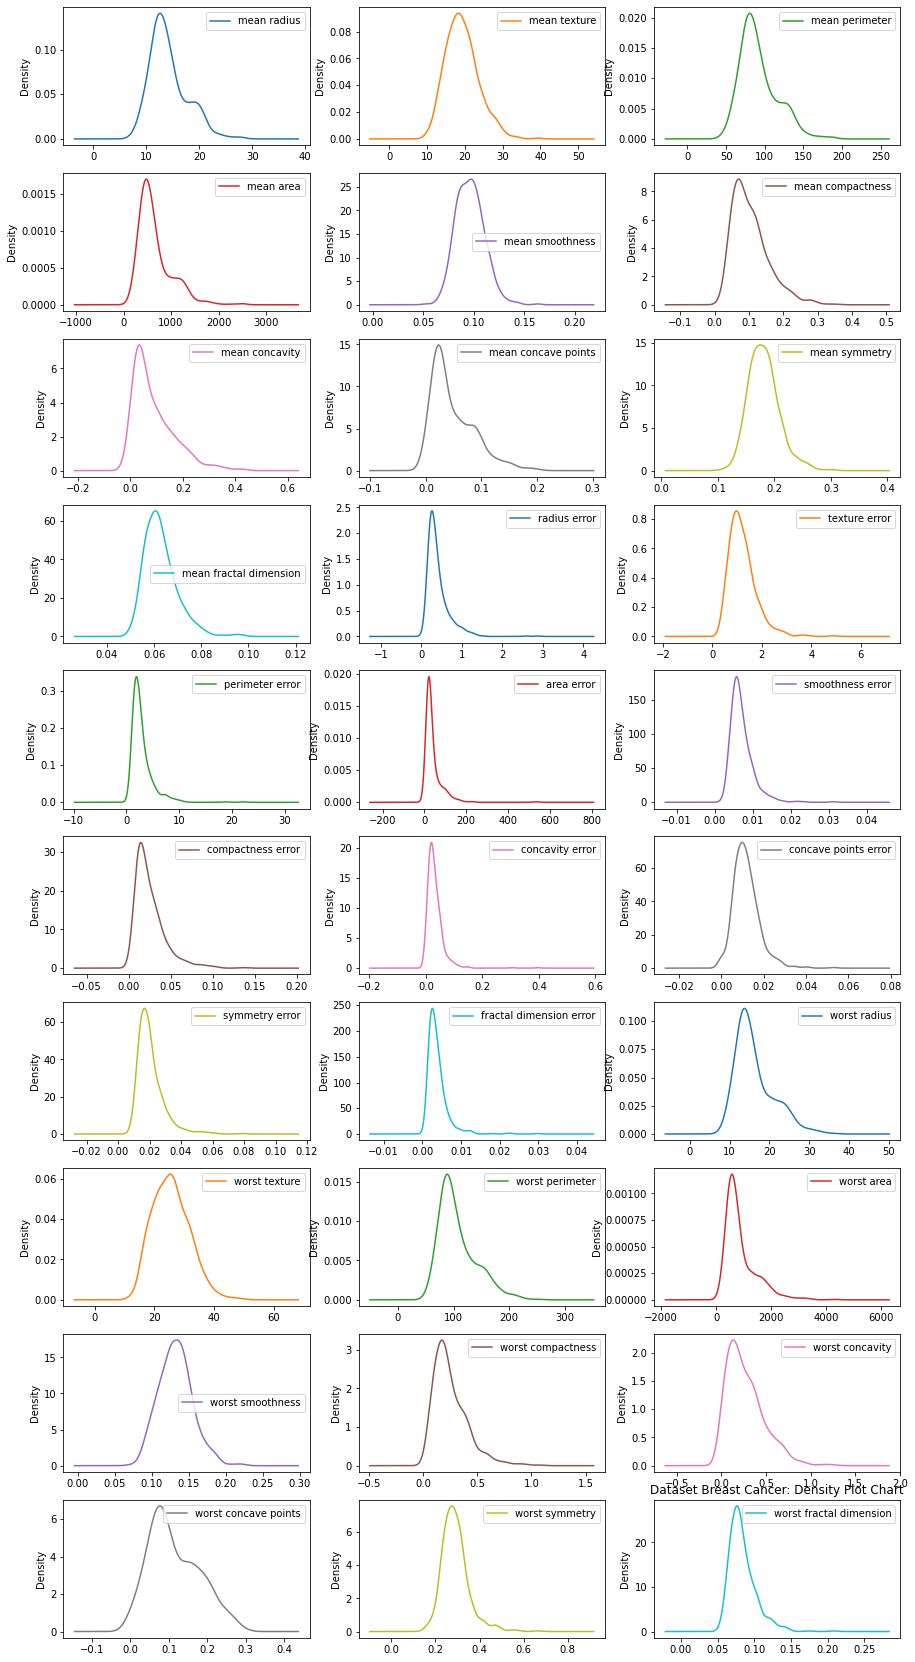

In [36]:
# Chart to verify dataset feature distribution - Density plot:
df.plot(kind = 'density', subplots = True, layout = (10,3), sharex = False, figsize = (15,30))
plt.title('Dataset Breast Cancer: Density Plot Chart')
plt.show()

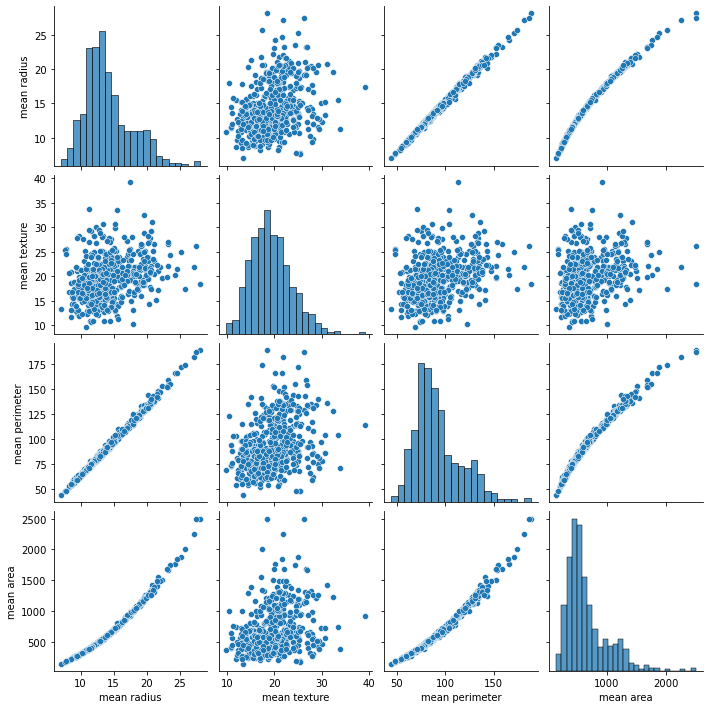

In [37]:
sns.pairplot(df[['mean radius','mean texture','mean perimeter','mean area']])
plt.show()

In [ ]:
sns.pairplot(df[['mean smoothness','mean compactness','mean concavity','mean symmetry']])
plt.show()

In [ ]:
# Including diagnosis column on data frame:
df['diagnosis'] = data_load.target

In [ ]:
# Checking class distribution:
# 0 - malignant
# 1 - benign
print(df.grupoby('diagnosis').size())